# Multi-Layer Perceptron (MLP) Model with PyTorch

Final loss: 0.0000


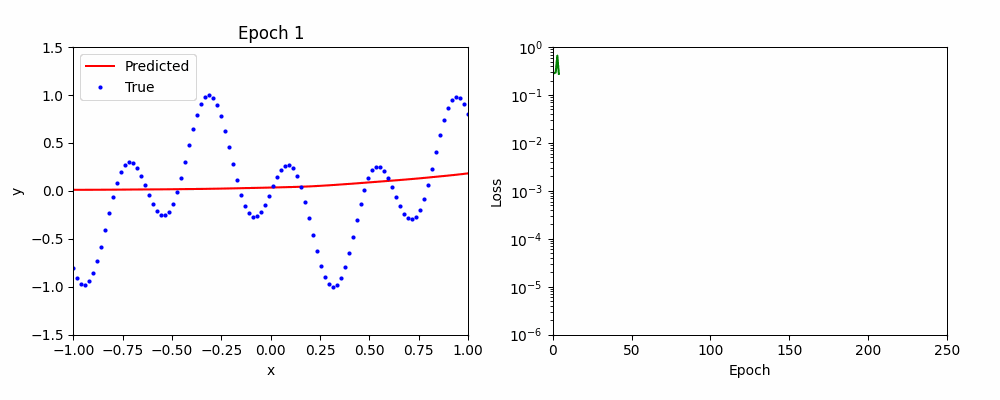

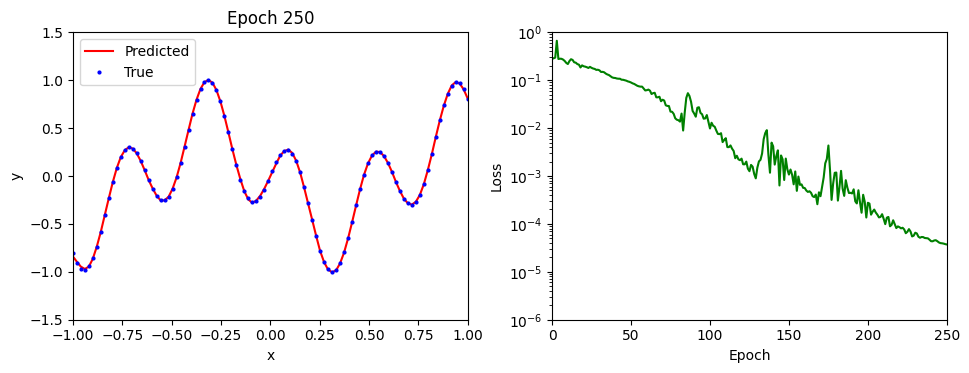

In [ ]:
'''
Purpose: 
    This code demonstrates the training of a Multi-Layer Perceptron (MLP) model using PyTorch to perform regression on a non-linear dataset. 
    It visualizes the training process by creating an animated plot of the model's predictions and the loss over epochs.

Summary:
    - Import necessary libraries.
    - Set random seeds for reproducibility.
    - Generate synthetic non-linear data.
    - Define an MLP model with multiple layers and activation functions.
    - Initialize the model, loss function, and optimizer.
    - Set up the training loop to update the model parameters.
    - Create an animated plot to visualize the model's predictions and training loss over epochs.
    - Save the animation as a GIF and display it in the notebook.
'''

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate data
x = np.linspace(-1, 1, 100).reshape(-1, 1)
#y = x**3
y = np.sin(5 * x) * np.cos(10 * x) + (x**7 - x**3) / 10

# Convert to PyTorch tensors
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 256),
            nn.GELU(),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.GELU(),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.GELU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 250
losses = []

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=3.0)

line1, = ax1.plot([], [], 'r-', label='Predicted')
line2, = ax1.plot(x, y, 'b.', label='True', markersize=4)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

line3, = ax2.plot([], [], 'g-')
ax2.set_xlim(0, num_epochs)
ax2.set_ylim(1e-6, 1)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_yscale('log')

# Animation function
def animate(epoch):
    # Forward pass
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss
    losses.append(loss.item())

    # Update the plot
    line1.set_data(x, y_pred.detach().numpy())
    line3.set_data(range(1, len(losses)+1), losses)
    ax1.set_title(f'Epoch {epoch+1}')

    return line1, line3

# Create the animation
anim = FuncAnimation(fig, animate, frames=num_epochs, interval=50, blit=True, repeat=False)

# Save the animation as a GIF
writer = PillowWriter(fps=30)
anim.save("mlp_regression_cubic.gif", writer=writer)

print(f"Final loss: {losses[-1]:.4f}")

# Display the GIF in the notebook
from IPython.display import Image
Image(filename="mlp_regression_cubic.gif")

In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Create an instance of the MLP class
input_dim = 1
output_dim = 1
mlp = MLP(input_dim, output_dim)

# Print the weights and biases of the MLP
for name, param in mlp.named_parameters():
    if 'weight' in name:
        print(f'{name} weights: {param.data}')
    if 'bias' in name:
        print(f'{name} bias: {param.data}')

fc1.weight weights: tensor([[0.7476]])
fc1.bias bias: tensor([0.1961])


In [3]:
# Import necessary libraries
import torch
import torch.nn as nn

# Define two points
point1 = torch.tensor([1, 2, 0],dtype=torch.float32)
point2 = torch.tensor([4, 6, 0],dtype=torch.float32)

# Create MSELoss instance
mse_loss = nn.MSELoss()

# Calculate MSE (which is the squared distance)
mse = mse_loss(point1, point2)

# Print Point 1, Point 2, and the Mean Squared Error
print(f"Point 1: {point1}")
print(f"Point 2: {point2}")
print(f"mean squared error (squared L2 norm): {mse.item():.4f}")

Point 1: tensor([1., 2., 0.])
Point 2: tensor([4., 6., 0.])
mean squared error (squared L2 norm): 8.3333


In [4]:
# Import necessary libraries
import torch

# Define the function: f(theta) = theta^2 + 5
def f(theta):
    return theta**2 + 5

# Initialize theta (we're trying to find the minimum of f(theta))
theta = torch.tensor([2.0], requires_grad=True)

# Hyperparameters
learning_rate = 0.1
n_iterations = 20

print("Starting gradient descent:")
print(f"Initial theta = {theta.item():.4f}, f(theta) = {f(theta).item():.4f}")

# Gradient descent loop
for i in range(n_iterations):
    # Compute the function value
    loss = f(theta)

    # Compute the gradient
    loss.backward()

    # Update theta using gradient descent
    with torch.no_grad():
        theta -= learning_rate * theta.grad

    # Reset the gradient for the next iteration
    theta.grad.zero_()

    if (i + 1) % 5 == 0:
        print(f"Iteration {i+1}: theta = {theta.item():.4f}, f(theta) = {f(theta).item():.4f}")

# Print thetas and function values
print(f"\nFinal result: theta = {theta.item():.4f}, f(theta) = {f(theta).item():.4f}")

Starting gradient descent:
Initial theta = 2.0000, f(theta) = 9.0000
Iteration 5: theta = 0.6554, f(theta) = 5.4295
Iteration 10: theta = 0.2147, f(theta) = 5.0461
Iteration 15: theta = 0.0704, f(theta) = 5.0050
Iteration 20: theta = 0.0231, f(theta) = 5.0005

Final result: theta = 0.0231, f(theta) = 5.0005


In [5]:
# Import necessary libraries
import torch
import torch.optim as optim

# Define the function: f(x) = x^2 + 5
def f(x):
    return x**2 + 5

# Initialize x (we're trying to find the minimum of f(x))
x = torch.tensor([2.0], requires_grad=True)

# Set up the optimizer
optimizer = optim.SGD([x], lr=0.1)

# Hyperparameters
n_iterations = 20

print("Starting optimization with PyTorch SGD:")
print(f"Initial x = {x.item():.4f}, f(x) = {f(x).item():.4f}")

# Optimization loop
for i in range(n_iterations):
    # Clear the gradients
    optimizer.zero_grad()

    # Compute the function value
    y = f(x)

    # Compute the gradient
    y.backward()

    # Update x using the optimizer
    optimizer.step()

    if (i + 1) % 5 == 0:
        print(f"Iteration {i+1}: x = {x.item():.4f}, f(x) = {f(x).item():.4f}")

# Print theta and function values
print(f"\nFinal result: x = {x.item():.4f}, f(x) = {f(x).item():.4f}")

Starting optimization with PyTorch SGD:
Initial x = 2.0000, f(x) = 9.0000
Iteration 5: x = 0.6554, f(x) = 5.4295
Iteration 10: x = 0.2147, f(x) = 5.0461
Iteration 15: x = 0.0704, f(x) = 5.0050
Iteration 20: x = 0.0231, f(x) = 5.0005

Final result: x = 0.0231, f(x) = 5.0005
